# 5. ランダムウォーク

## 1次元ランダムウォーク

図のように 1 本の道の上で、酔っぱらいが、ふらふらといったりきたりしているとする。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-1-1.jpg)

シミュレーションは以下。ベルヌーイ試行を時刻 $t$ ごとに行う。勝ったり負けたりのゲームと考えれば、持ち金の金額の変化を表す。

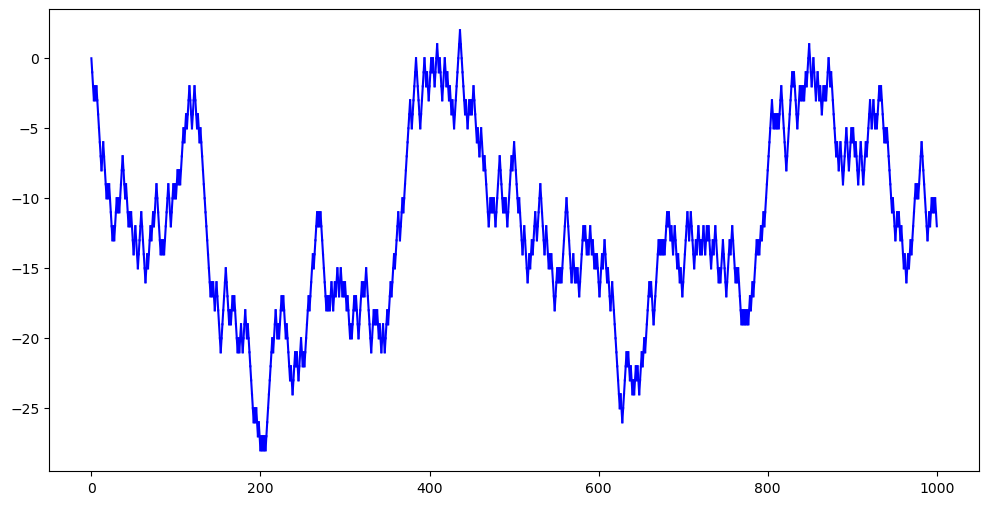

In [16]:
using Random
using PyPlot

t_end = 1000   # 終わりの時刻
p = 0.5        # 確率
x = [0, 0]
fig = PyPlot.figure(figsize=(12.0, 6.0))
ax = fig.add_subplot()

for i = 0:(t_end-1)
    x[1] = x[2]
    if rand() > p
        x[2] += 1
    else
        x[2] -= 1
    end
    t = [i, i+1]
    ax.plot(t, x, color="blue")
end

## 2次元ランダムウォーク

平面上をブラウン運動する粒子を考える。周囲の流体の分子から乱雑な衝撃を受け、ブラウン粒子はランダムな方向に運動をするが、その方向は、$0$ から $2\pi$ の間に一様に分布すると考えられる。衝撃を受けたブラウン粒子は、そのたびごとにさまざまな距離を進むと考えられるが、ここでは、図のように一定の距離を進むものとする。このような、2 次元のランダムウォークをシミュレーションする。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-2-11.jpg)

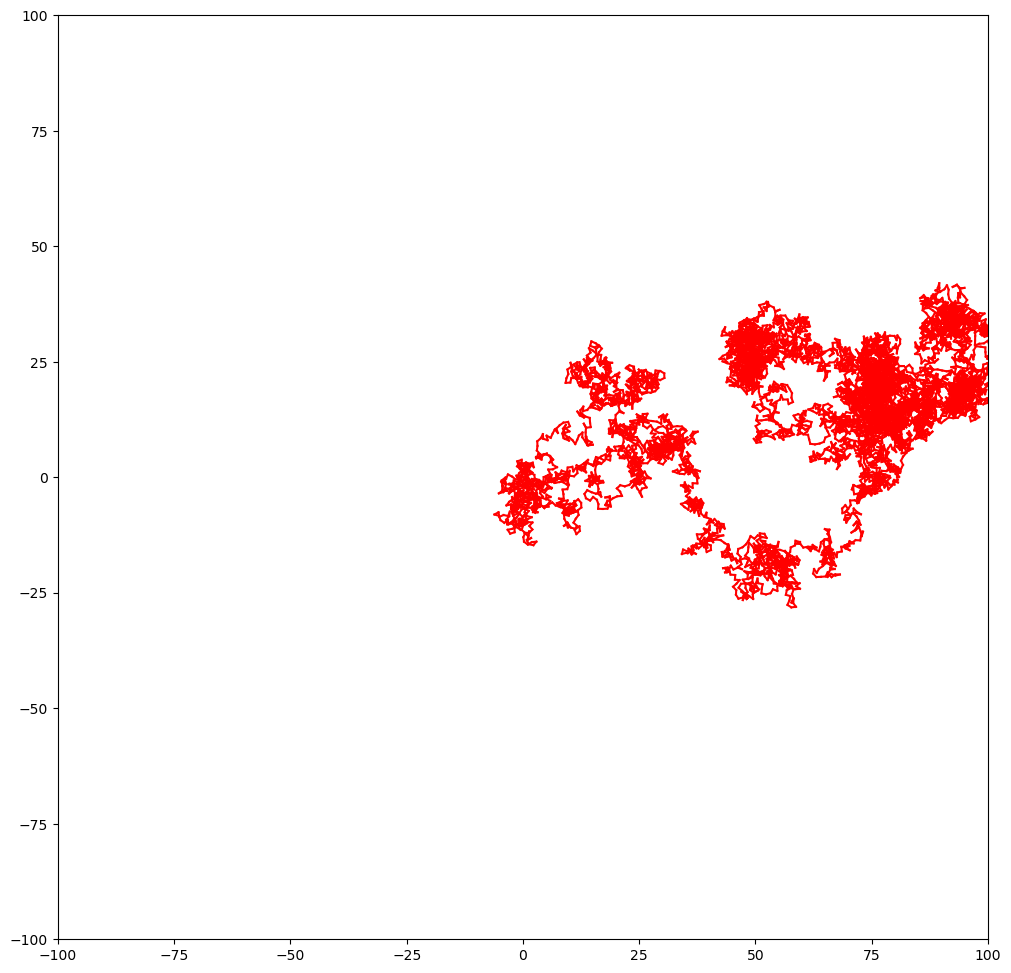

In [24]:
using Random
using PyPlot

t_end = 10000
x0 = 0.0
y0 = 0.0

fig = PyPlot.figure(figsize=(12.0, 12.0))
ax = fig.add_subplot()
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)

for t = 1:t_end
    theta = 2.0π * rand()
    x1 = x0 + cos(theta)
    y1 = y0 + sin(theta)
    x = [x0, x1]
    y = [y0, y1]

    ax.plot(x, y, color="red")
    
    x0 = x1
    y0 = y1
end

## 拡散のシミュレーション

「拡散過程」とは、たくさんの粒子を一ケ所に集めて、ブラウン運動をさせると、粒子はどんどん広がって、ついには、一様にひろがってしまう、という過程。

単位時間に一度ずつ、衝撃を受けるブラウン運動で、 $t=0$ で原点にいた粒子が、 $t=n$ にはどこにいる確率が高いかを考える。下図のように、一回の衝撃で動く距離を 1 とすると、ブラウン粒子が、 $n$ 回目の衝撃をうけると、原点からの距離 $d_n$ は、次のように求められる：

$$
    d_n = \sqrt{(\cos{\theta_1}+\cos{\theta_2}+\cdot\cdot\cdot\cos{\theta_n})^2+(\sin{\theta_1}+\sin{\theta_2}+\cdot\cdot\cdot\sin{\theta_n})^2}
        = \sqrt{n+2(\cos{\theta_1}\cdot\cos{\theta_2}+\cos{\theta_1}\cdot\cos{\theta_3}+\cdot\cdot\cdot\sin{\theta_1}\cdot\sin{\theta_2}+\sin{\theta_1}\cdot\sin{\theta_3}+\cdot\cdot\cdot)}
        = \sqrt{n+2\{\cos(\theta_1-\theta_2)+\cos(\theta_1-\theta_2)\cdot\cdot\cdot\cos(\theta_i-\theta_j)\cdot\cdot\cdot\}}
$$

$n \rightarrow \infty$ とすると、平方根の中身の第2項は $n$ に比べて無視できるほど小さくなるので、

$$
    d_n \approx \sqrt{n}
$$

となる。原点からの平均距離は衝撃の回収がふえると、その回数の平方根に比例して遠くなる。たくさんの粒子を一ケ所に集めて、ブラウン運動をさせると、粒子はどんどん広がって、ついには一様に分布してしまう。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-3-11.jpg)

[シミュレーションのソースコード](./src/spread_simulation/main.jl)

![シミュレーションの結果：粒子の運動](./src/spread_simulation/result_animation.png)
![シミュレーションの結果：原点からの平均距離](./src/spread_simulation/distance.png)


## ホコリのシミュレーション

周囲を壁で覆ってみる。また、中心部では速く、周辺部では遅く動くようにしてみる。この状態では、部屋の中のホコリの動きをシミュレーションしていることとなる。

初期条件として、粒子を一様分布させる。
。粒子の動き方を単位時間あたりに進む長さを $l$ としたとき、
$$
    l = \sqrt{2}\cdot MAX -\sqrt{x_i^2 + y_i^2}\cdot
$$
とする。ただし、$MAX$ は壁までの距離、$x_i, y_i$ は粒子 $i$ の位置とする。すなわち、中心部では最速スピード $l = \sqrt{2}\cdot MAX$ で動き、中心部から最も隅の $x_i^2 + y_i^2 = \sqrt{2}\cdot MAX$ のとき、停止状態となる。

また、次のクロックにおける位置を計算した結果、その値が $MAX$ を超えた場合、図のように、壁のところで、完全反射するものとする。

![](https://www.ishikawa-lab.com/montecarlo/jpg/fig6-4-1.jpg)

[シミュレーションのソースコード](./src/dust_simulation/main.jl)

- 初期状態（$t=0$）
    ![](./src/dust_simulation/figure.0.png)
- $t=100$
    ![](./src/dust_simulation/figure.100.png)
- $t=1999$
    ![](./src/dust_simulation/figure.1999.png)